In [1]:
from data_utils import load_data, flatten_data
from early_model import stacked_lstm
from model_utils import model_pipeline, plot_history
import numpy as np
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix
from scipy.stats import ttest_ind
from scipy.stats import spearmanr

In [2]:
train_participant_num = ["C56D", "C93D", "C382D", "C382N", "C544D", "C709N", "C788N", "P113D", "P113N", "P191D", "P191N", "P299D", "P299N", "P300D", "P336D", "P492D", "P492N", "P531N", "P699D", "P699N", "P890N", "P921D", "P921N"]
valid_participant_num = ["C67D", "C202D", "C202N", "C256D", "C256N", "P54D", "P54N", "P342D", "P342N", "P487D", "P487N", "P649N"]

X_train, y_train = load_data(train_participant_num, 'train', downsampling=True, angle_energy=False, augment=False)
X_valid, y_valid = load_data(valid_participant_num, 'validation')

C56D is not selected to be used for training (downsampling)
C93D is not selected to be used for training (downsampling)
C382D is not selected to be used for training (downsampling)
C382N is not selected to be used for training (downsampling)
C544D is not selected to be used for training (downsampling)
C709N is not selected to be used for training (downsampling)
C788N is not selected to be used for training (downsampling)
P113D is selected to be used for training (downsampling)
P113N is selected to be used for training (downsampling)
P191D is selected to be used for training (downsampling)
P191N is selected to be used for training (downsampling)
P299D is selected to be used for training (downsampling)
P299N is selected to be used for training (downsampling)
P300D is selected to be used for training (downsampling)
P336D is selected to be used for training (downsampling)
P492D is selected to be used for training (downsampling)
P492N is selected to be used for training (downsampling)
P531N

In [3]:
#X,Y,Z Coordinates
X_train_pose = X_train[:, :, 0:66]
X_valid_pose = X_valid[:, :, 0:66]
#sEMG
X_train_sEMG = X_train[:, :, 66:70]
X_valid_sEMG = X_valid[:, :, 66:70]

In [4]:
input_shape_pose = (X_train_pose.shape[1], X_train_pose.shape[2])
input_shape_sEMG = (X_train_sEMG.shape[1], X_train_sEMG.shape[2])
num_classes = y_train.shape[1]

model_pose = stacked_lstm(input_shape_pose, num_classes)
model_sEMG = stacked_lstm(input_shape_sEMG, num_classes)

In [5]:
y_pred_pose, y_true_pose, H_pose = model_pipeline(model_pose, X_train_pose, y_train, X_valid_pose, y_valid)
y_pred_sEMG, y_true_sEMG, H_sEMG = model_pipeline(model_sEMG, X_train_sEMG, y_train, X_valid_sEMG, y_valid)


Epoch 1: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 1/50
11/11 [==============================] - 6s 416ms/step - loss: 0.1551 - binary_accuracy: 0.7148 - val_loss: 0.0997 - val_binary_accuracy: 0.9404 - lr: 0.0010

Epoch 2: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 2/50
11/11 [==============================] - 4s 395ms/step - loss: 0.1429 - binary_accuracy: 0.7640 - val_loss: 0.0944 - val_binary_accuracy: 0.9404 - lr: 0.0010

Epoch 3: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 3/50
11/11 [==============================] - 5s 419ms/step - loss: 0.1395 - binary_accuracy: 0.7694 - val_loss: 0.0943 - val_binary_accuracy: 0.9404 - lr: 0.0010

Epoch 4: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 4/50
11/11 [==============================] - 4s 399ms/step - loss: 0.1388 - binary_accuracy: 0.7729 - val_loss: 0.0971 - val_binary_accuracy: 0.9404 - lr: 0.0010

Epo

/Users/haydengu/anaconda3/envs/quant/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/haydengu/anaconda3/envs/quant/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/haydengu/anaconda3/envs/quant/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

Classification report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      2698
           1       0.00      0.00      0.00       171

    accuracy                           0.94      2869
   macro avg       0.47      0.50      0.48      2869
weighted avg       0.88      0.94      0.91      2869

Confusion matrix:
[[2698    0]
 [ 171    0]]

Epoch 1: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 1/50
11/11 [==============================] - 6s 409ms/step - loss: 0.1671 - binary_accuracy: 0.7063 - val_loss: 0.1396 - val_binary_accuracy: 0.9404 - lr: 0.0010

Epoch 2: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 2/50
11/11 [==============================] - 4s 375ms/step - loss: 0.1502 - binary_accuracy: 0.7859 - val_loss: 0.1026 - val_binary_accuracy: 0.9404 - lr: 0.0010

Epoch 3: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 3/50
11/11 [=========

In [10]:
xyz_correlations = []
for i in range(66):  # 遍历每个特征
    repeated_y_train = np.repeat(y_train, X_train_pose.shape[1], axis=0)
    coef, _ = spearmanr(X_train_pose[:, :, i].flatten(), repeated_y_train[:X_train_pose[:, :, i].flatten().shape[0]])
    xyz_correlations.append(coef)

avg_xyz_correlation = np.mean(xyz_correlations)

sEMG_correlations = []
for i in range(4):  # sEMG数据有4个通道
    repeated_y_train_sEMG = np.repeat(y_train, X_train_sEMG.shape[1], axis=0)
    coef, _ = spearmanr(X_train_sEMG[:, :, i].flatten(), repeated_y_train_sEMG[:X_train_sEMG[:, :, i].flatten().shape[0]])
    sEMG_correlations.append(coef)

avg_sEMG_correlation = np.mean(sEMG_correlations)

print(avg_xyz_correlation)
print(avg_sEMG_correlation)

all_correlations = []
all_correlations.append(avg_xyz_correlation)
all_correlations.append(avg_sEMG_correlation)

abs_correlations = np.abs(all_correlations)
normalized_weights = abs_correlations / np.sum(abs_correlations)
print(normalized_weights)

0.1111111111111111
0.1111111111111111
[0.5 0.5]


In [11]:
weight_pose = normalized_weights[0]
weight_sEMG = normalized_weights[1]

In [12]:
# 加权投票融合
final_pred = (y_pred_pose * weight_pose + y_pred_sEMG * weight_sEMG) / (weight_pose + weight_sEMG)
final_pred = np.round(final_pred).astype(int)

# 评估最终模型
print(classification_report(y_true_pose, final_pred))
print(confusion_matrix(y_true_pose, final_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      2698
           1       0.00      0.00      0.00       171

    accuracy                           0.94      2869
   macro avg       0.47      0.50      0.48      2869
weighted avg       0.88      0.94      0.91      2869

[[2698    0]
 [ 171    0]]


/Users/haydengu/anaconda3/envs/quant/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/haydengu/anaconda3/envs/quant/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/haydengu/anaconda3/envs/quant/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

In [13]:
X_train_all = X_train
X_valid_all = X_valid

input_shape_all = (X_train_all.shape[1], X_train_all.shape[2])

model_all = stacked_lstm(input_shape_all, num_classes)

y_pred_all, y_true_all, H_all = model_pipeline(model_all, X_train_all, y_train, X_valid_all, y_valid)


Epoch 1: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 1/50
11/11 [==============================] - 5s 365ms/step - loss: 0.1535 - binary_accuracy: 0.7187 - val_loss: 0.0938 - val_binary_accuracy: 0.9404 - lr: 0.0010

Epoch 2: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 2/50
11/11 [==============================] - 4s 383ms/step - loss: 0.1470 - binary_accuracy: 0.7709 - val_loss: 0.0998 - val_binary_accuracy: 0.9404 - lr: 0.0010

Epoch 3: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 3/50
11/11 [==============================] - 4s 371ms/step - loss: 0.1405 - binary_accuracy: 0.7773 - val_loss: 0.1053 - val_binary_accuracy: 0.9404 - lr: 0.0010

Epoch 4: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 4/50
11/11 [==============================] - 4s 373ms/step - loss: 0.1374 - binary_accuracy: 0.7819 - val_loss: 0.1064 - val_binary_accuracy: 0.9404 - lr: 0.0010

Epo

/Users/haydengu/anaconda3/envs/quant/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/haydengu/anaconda3/envs/quant/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/haydengu/anaconda3/envs/quant/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

In [14]:
print(classification_report(y_true_all, np.round(y_pred_all)))
print(confusion_matrix(y_true_all, np.round(y_pred_all)))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      2698
           1       0.00      0.00      0.00       171

    accuracy                           0.94      2869
   macro avg       0.47      0.50      0.48      2869
weighted avg       0.88      0.94      0.91      2869

[[2698    0]
 [ 171    0]]


/Users/haydengu/anaconda3/envs/quant/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/haydengu/anaconda3/envs/quant/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/haydengu/anaconda3/envs/quant/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

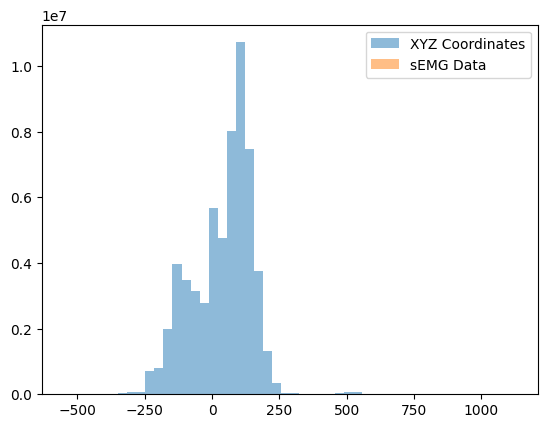

In [10]:
import matplotlib.pyplot as plt
import scipy.stats as stats

# 假设X_train_pose和X_train_sEMG是NumPy数组
# 绘制直方图
plt.hist(X_train_pose.flatten(), bins=50, alpha=0.5, label='XYZ Coordinates')
plt.hist(X_train_sEMG.flatten(), bins=50, alpha=0.5, label='sEMG Data')
plt.legend()
plt.show()

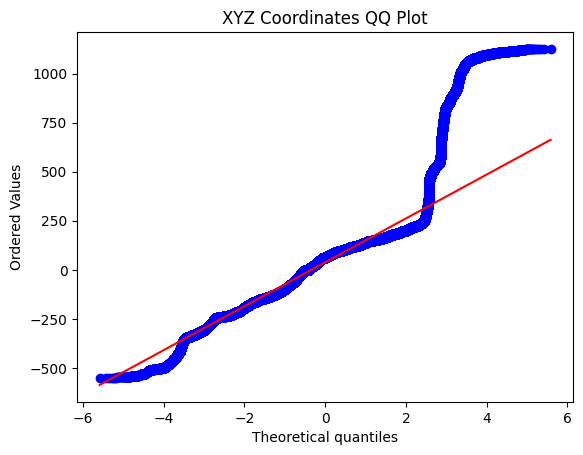

In [11]:
# 绘制QQ图
stats.probplot(X_train_pose.flatten(), dist="norm", plot=plt)
plt.title('XYZ Coordinates QQ Plot')
plt.show()

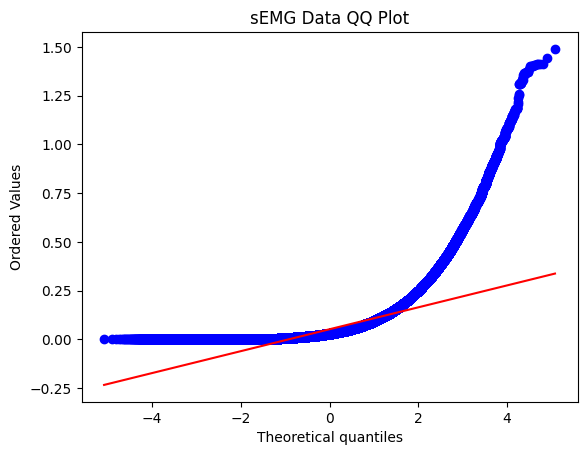

In [12]:
stats.probplot(X_train_sEMG.flatten(), dist="norm", plot=plt)
plt.title('sEMG Data QQ Plot')
plt.show()

In [15]:
from scipy.stats import spearmanr

In [23]:
pose_correlations = []
for i in range(X_train_pose.shape[2]):  # 遍历每个特征维度
    repeated_y_train = np.repeat(y_train, X_train_pose.shape[1])
    coef, p_value = spearmanr(X_train_pose[:, :, i].flatten(), repeated_y_train[:X_train_pose[:, :, i].flatten().shape[0]])
    pose_correlations.append((coef, p_value))
# 对于sEMG数据，我们采取相同的方法
sEMG_correlations = []
for i in range(X_train_sEMG.shape[2]):  # 遍历每个特征维度
    repeated_y_train = np.repeat(y_train, X_train_sEMG.shape[1])
    coef, p_value = spearmanr(X_train_sEMG[:, :, i].flatten(), repeated_y_train[:X_train_sEMG[:, :, i].flatten().shape[0]])
    sEMG_correlations.append((coef, p_value))



weight_pose_abs_avg = np.mean(np.abs([coef for coef, p in pose_correlations]))
weight_sEMG_abs_avg = np.mean(np.abs([coef for coef, p in sEMG_correlations]))


# 权重归一化
total_weight_avg = weight_pose_abs_avg + weight_sEMG_abs_avg
normalized_weight_pose = weight_pose_abs_avg / total_weight_avg
normalized_weight_sEMG = weight_sEMG_abs_avg / total_weight_avg

# 加权投票融合
# 注意：确保y_pred_pose和y_pred_sEMG的形状相同，且与y_true_pose匹配
final_pred = y_pred_pose * normalized_weight_pose + y_pred_sEMG * normalized_weight_sEMG

# 如果final_pred是概率，需要确定转换为类别索引的方法
# 例如，可以选择概率最高的类别作为预测类别
final_pred_class = np.round(final_pred).astype(int)

print(classification_report(y_true_pose, final_pred_class))
print(confusion_matrix(y_true_pose, final_pred_class))

              precision    recall  f1-score   support

           0       0.98      0.86      0.92      2698
           1       0.25      0.74      0.38       171

    accuracy                           0.85      2869
   macro avg       0.62      0.80      0.65      2869
weighted avg       0.94      0.85      0.89      2869

[[2326  372]
 [  45  126]]
